# Regressão logística com Python

Para esta aula, estaremos trabalhando com o [Conjunto de dados do Titanic da Kaggle](https://www.kaggle.com/c/titanic). Este é um conjunto de dados muito famoso e muitas vezes é o primeiro passo em Machine Learning!

Vamos tentar montar um algoritmo de classificação sobrevivente ou falecido utilizando regressão logística no Python.

Usaremos uma versão "semi-limpa" do conjunto de dados do Titanic. Se você usar o conjunto de dados hospedado diretamente no Kaggle, talvez seja necessário fazer uma limpeza adicional não mostrada neste notebook.


## Importar bibliotecas

Vamos importar algumas bibliotecas para começar!


In [112]:
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install seaborn --upgrade


In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 100


## Os dados

Vamos começar lendo o arquivo titanic_train.csv em um DataFrame pandas.


In [114]:
# from google.colab import drive
# drive.mount('/content/drive')


In [115]:
# train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regressão Logística/dados/titanic_train.csv')
train = pd.read_csv('data/titanic_train.csv')


In [116]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Análise de dados exploratórios

Vamos começar algumas análises de dados exploratórios. Começaremos por verificar os dados que faltam!


### Dados ausentes

Podemos usar seaborn para criar um mapa de calor simples para ver onde estamos perdendo dados!


In [118]:
train.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

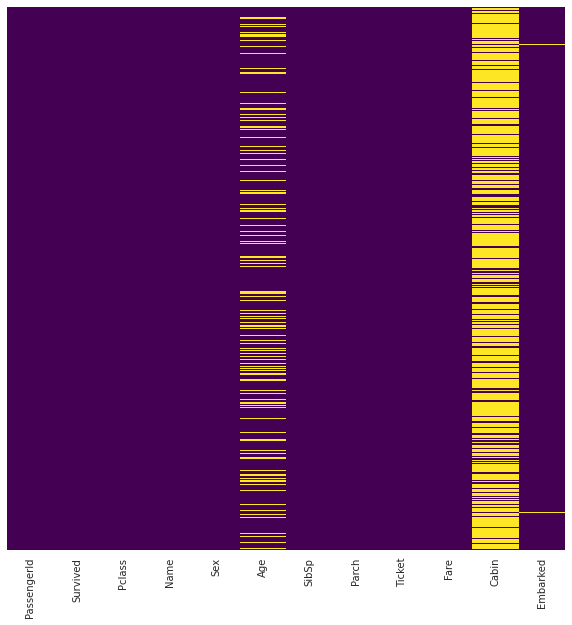

In [120]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


Aproximadamente 20% dos dados de idade estão faltando. A proporção de idade que falta é provavelmente pequena o suficiente para que possamos fazer uma substituição razoável com alguma forma de imputação de dados. Olhando para a coluna Cabin, porém, parece que estamos perdendo muito desses dados para fazermos o mesmo. Provavelmente vamos descartar isso mais tarde ou mudá-lo para outro "Cabin Conhecido: 1 ou 0"

Continuemos visualizando mais alguns dos dados! Confira o vídeo para obter explicações completas sobre esses gráficos, este código é apenas para servir como referência.


<AxesSubplot:xlabel='Survived', ylabel='count'>

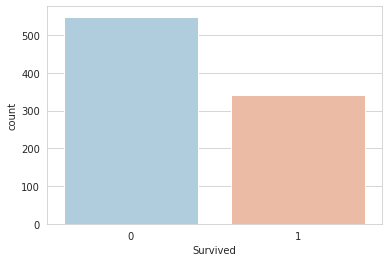

In [121]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')


<AxesSubplot:xlabel='Survived', ylabel='count'>

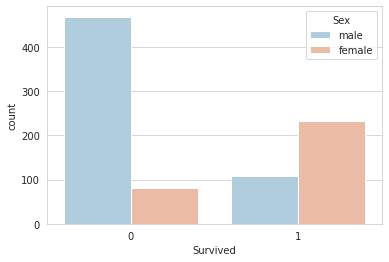

In [122]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')


<AxesSubplot:xlabel='Survived', ylabel='count'>

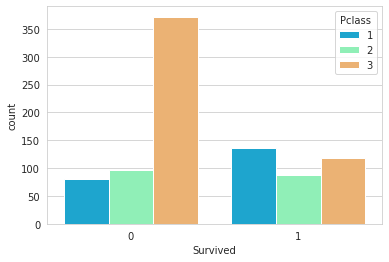

In [123]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')


<AxesSubplot:>

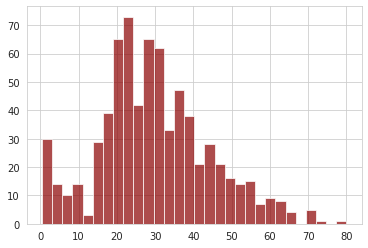

In [124]:
train['Age'].hist(bins=30, color='darkred', alpha=0.7)


/home/ledragox/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

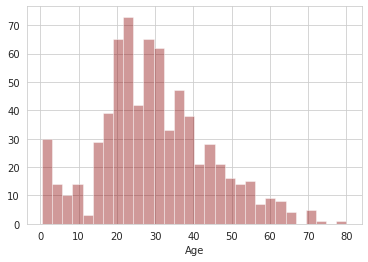

In [125]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=30)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

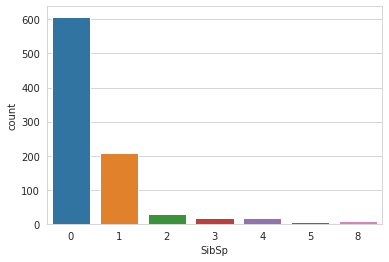

In [126]:
sns.countplot(x='SibSp', data=train)


<AxesSubplot:>

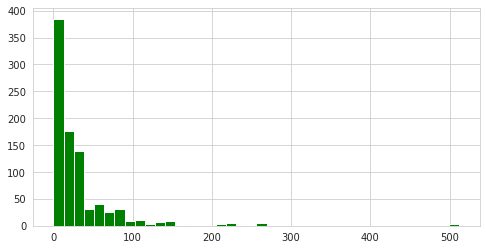

In [127]:
train['Fare'].hist(color='green', bins=40, figsize=(8, 4))


---

### Limpando os dados

Queremos preencher dados de idade faltantes, em vez de simplesmente deixar cair as linhas de dados de idade que faltam. Uma maneira de fazer isso é preenchendo a idade média de todos os passageiros (imputação).
No entanto, podemos ser mais inteligentes sobre isso e verificar a idade média pela classe de passageiros. Por exemplo:


<AxesSubplot:>

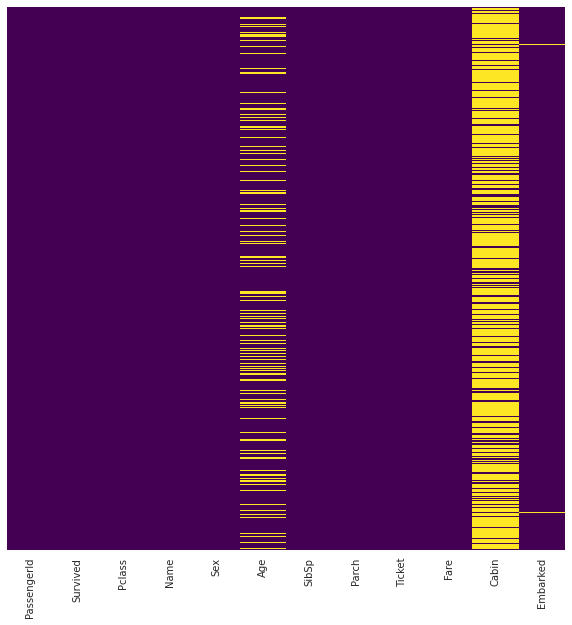

In [128]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

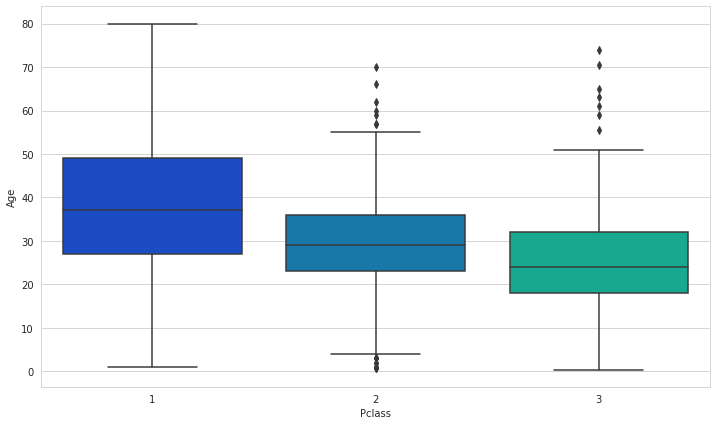

In [129]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


Podemos ver os passageiros mais ricos nas (que estão nas classes superiores) tendem a ser mais velhos, o que faz sentido. Usaremos esses valores de idade média para imputar com base em Pclass for Age.


Agora aplique essa função!


In [130]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
train[["Pclass", "Age"]].head(10)


,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
5,3,NaN
6,1,54.0
7,3,2.0
8,3,27.0
9,2,14.0


In [132]:
train[train["Age"].isnull()][["Pclass", "Age"]].head(10)


,Pclass,Age
5,3,NaN
17,2,NaN
19,3,NaN
26,3,NaN
28,3,NaN
29,3,NaN
31,1,NaN
32,3,NaN
36,3,NaN
42,3,NaN


In [133]:
by_pclass = train.groupby(['Pclass'])


In [134]:
by_pclass["Age"].get_group(3)


0      22.0
2      26.0
4      35.0
5       NaN
7       2.0
       ... 
882    22.0
884    25.0
885    39.0
888     NaN
890    32.0
Name: Age, Length: 491, dtype: float64

In [135]:
round(by_pclass['Age'].get_group(3).mean())


25

In [136]:
def input_age(series): return round(series.fillna(series.mean()))


train['Age'] = by_pclass['Age'].transform(input_age)


In [137]:
train[train["Pclass"] == 2][["Pclass", "Age"]].head(20)


,Pclass,Age
9,2,14.0
15,2,55.0
17,2,30.0
20,2,35.0
21,2,34.0
33,2,66.0
41,2,27.0
43,2,3.0
53,2,29.0
56,2,21.0


Agora vamos verificar esse mapa de calor novamente!


<AxesSubplot:>

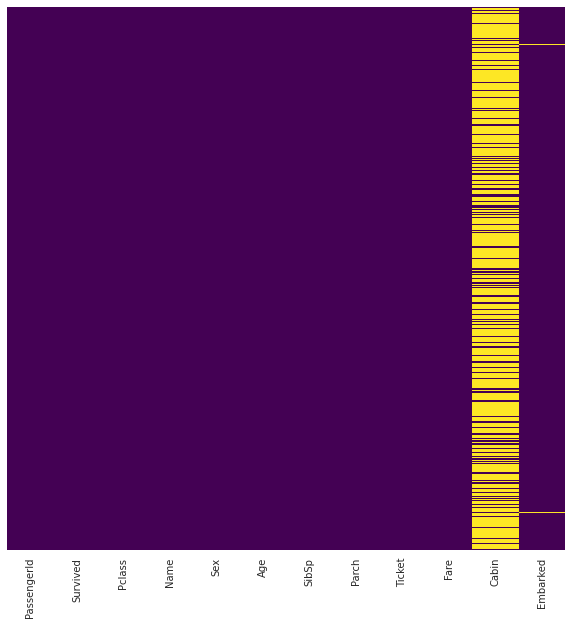

In [138]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


Ótimo! Vamos seguir em frente e deletar a coluna Cabin e a linha em Embarked que falta dado.


In [139]:
train.drop('Cabin', axis=1, inplace=True)


In [140]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

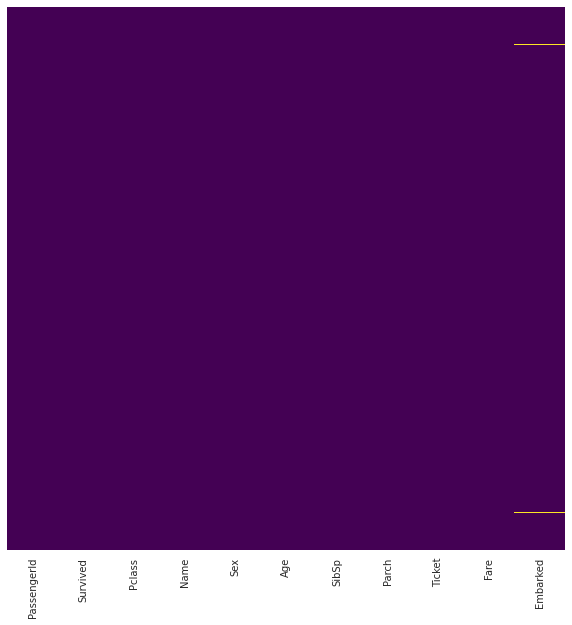

In [141]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [142]:
train.dropna(inplace=True)


<AxesSubplot:>

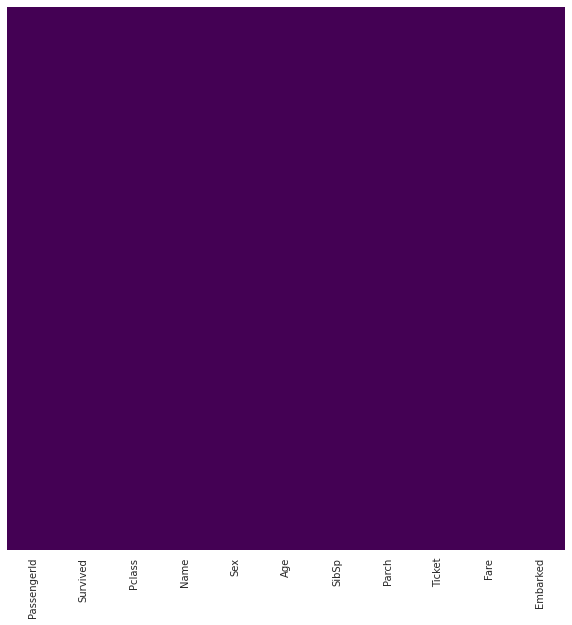

In [143]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [144]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Convertendo recursos categóricos

Precisamos converter características categóricas em variáveis dummy usando pandas! Caso contrário, nosso algoritmo de Machine Learning não será capaz de aceitar esses recursos diretamente como entradas.


In [145]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [146]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [147]:
labelencoder_Sex = LabelEncoder()
train["Sex"] = labelencoder_Sex.fit_transform(train["Sex"])


In [148]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [149]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [150]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [151]:
tcols = train.columns
for loc, item in ([0, "C"], [1, "Q"], [2, "S"]):
    tcols = tcols.insert(loc, item)

tcols = tcols.drop('Embarked')
tcols


Index(['C', 'Q', 'S', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [152]:
ct = ColumnTransformer(
    [("Embarkeds", OneHotEncoder(), ["Embarked"])], remainder='passthrough')
train = pd.DataFrame(ct.fit_transform(train), columns=tcols)


In [153]:
train.head()


,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500


Ótimo! Nossos dados estão prontos para o nosso modelo

## Construindo um modelo de Regressão Logística

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes (há outro arquivo test.csv que você pode usar ao invés, caso queira usar todos esses dados para treinar).


### Divisão treino-teste


In [154]:
from sklearn.model_selection import train_test_split


In [155]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=0)


### Training and Predicting


In [156]:
from sklearn.linear_model import LogisticRegression


In [157]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


/home/ledragox/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
predictions = logmodel.predict(X_test)


Vamos seguir em frente para avaliar o nosso modelo!


## Avaliação


Podemos verificar a precisão, o recall e a pontuação f1 usando o relatório de classificação!


In [159]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [160]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       157
         1.0       0.74      0.67      0.70       110

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



In [161]:
cm = confusion_matrix(y_test, predictions)


Matriz de Confusão, sem normalização
[[131  26]
 [ 36  74]]
Normalizada
[[0.8343949  0.1656051 ]
 [0.32727273 0.67272727]]


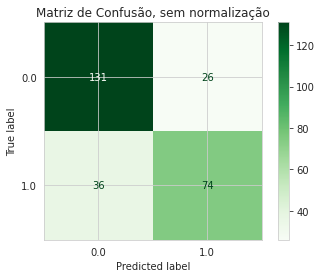

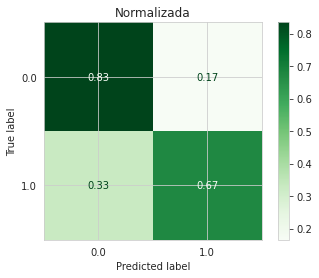

In [162]:
titles_options = [("Matriz de Confusão, sem normalização", None),
                  ("Normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,

                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Não foi tão ruim! Você pode querer explorar outros recursos no outro arquivo titanic_text.csv. Algumas sugestões:

- Tente pegar o título (Dr., Sr., Sra., Etc.) do nome como parâmetro.
- Talvez a cabine possa ser uma característica.
- Existe alguma informação que você pode obter do bilhete?
